In [98]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [153]:
# Reading the data

from collections import namedtuple
from csv import reader

Row = namedtuple('Row', 'date,time,location,operator,flight,route,type,registration,cn_in,aboard,fatalities,ground,summary')

rows = []
with open('./airplane-crashes.csv', newline='\n') as f:
    # skip the column names
    col_names = next(f)
    linereader = reader(f, delimiter=',', quotechar='"')
    rows = list(map(lambda l: Row(*l), linereader))


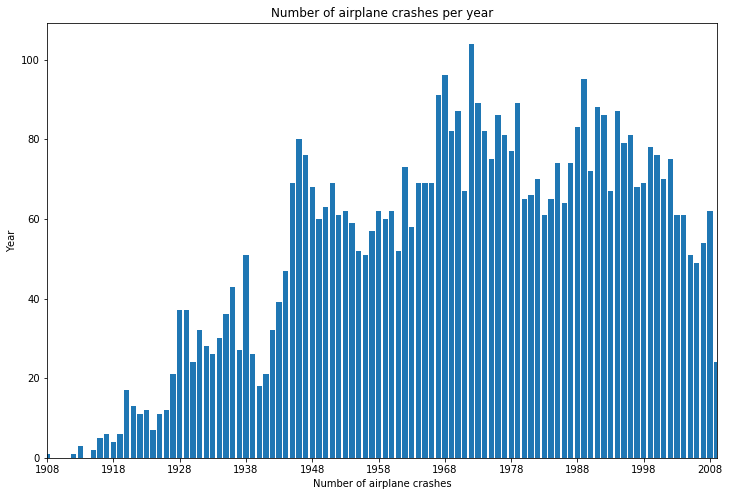

In [100]:
# yearly, how many planes crashed
from dateutil import parser
from collections import OrderedDict 
from operator import itemgetter

crashes_by_year = {}
for r in rows:
    year = parser.parse(r.date).year
    crashes_by_year[year] = crashes_by_year.get(year, 0) + 1

pairs = sorted(crashes_by_year.items())
xs = list(map(itemgetter(0), pairs))
ys = list(map(itemgetter(1), pairs))

plt.bar(xs, ys)
plt.title('Number of airplane crashes per year')
plt.xlabel('Number of airplane crashes')
plt.ylabel('Year')
plt.xlim([1908, 2009])
plt.xticks(range(1908, 2009, 10))
plt.draw()

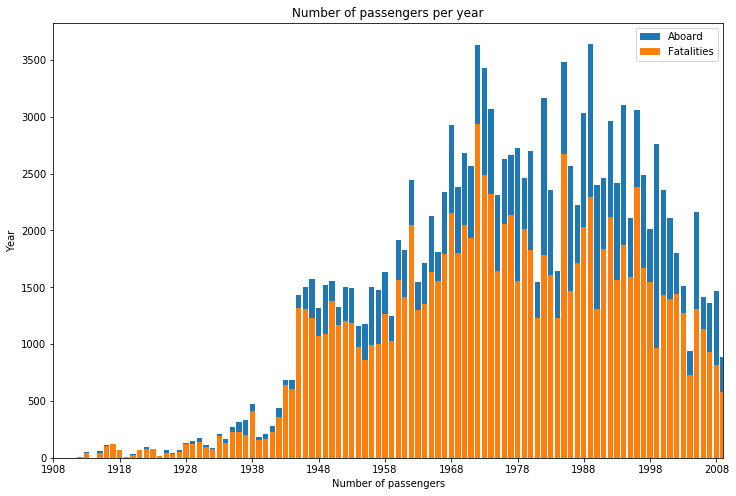

In [154]:
# how many where aboard

# yearly, how many planes crashed
from dateutil import parser
from collections import OrderedDict 
from operator import itemgetter

aboard_by_year = {}
fatalities_by_year = {}
survivors_by_year = {}
for r in rows:
    year = parser.parse(r.date).year
    try:
        aboard = int(r.aboard)
    except ValueError as e:
        aboard = 0
    try:
        fatalities = int(r.fatalities)
    except ValueError as e:
        fatalities = 0
    aboard_by_year[year] = aboard_by_year.get(year, 0) + aboard
    fatalities_by_year[year] = fatalities_by_year.get(year, 0) + fatalities
    survivors_by_year[year] = survivors_by_year.get(year, 0) + (aboard - fatalities)

aboard_pairs = sorted(aboard_by_year.items())

fatalities_pairs = sorted(fatalities_by_year.items())
survivors_pairs = sorted(survivors_by_year.items())

years = list(map(itemgetter(0), aboard_pairs))
aboard_ys = list(map(itemgetter(1), aboard_pairs))
fatalities_ys = list(map(itemgetter(1), fatalities_pairs))
survivors_ys = list(map(itemgetter(1), survivors_pairs))

plt.bar(years, aboard_ys)
plt.bar(years, fatalities_ys)
# plt.bar(years, survivors_ys)
plt.title('Number of passengers per year')
plt.xlabel('Number of passengers')
plt.legend(['Aboard', 'Fatalities', 'Survivors'])
plt.ylabel('Year')
plt.xlim([1908, 2009])
plt.xticks(range(1908, 2009, 10))
plt.draw()

In [152]:
# By operator and aircraft type
import numpy as np
from collections import Counter
from operator import attrgetter

operators = list(map(attrgetter('operator'), rows))
types = list(map(attrgetter('type'), rows))

operator_counter = Counter(operators)
types_counter = Counter(types)

print(operator_counter.most_common(3))
print(types_counter.most_common(3))

[('Aeroflot', 179), ('Military - U.S. Air Force', 176), ('Air France', 70)]
[('Douglas DC-3', 334), ('de Havilland Canada DHC-6 Twin Otter 300', 81), ('Douglas C-47A', 74)]
